Basic Statistics:
       Temperature (C)
count       365.000000
mean         11.943598
std          13.582553
min          -9.994574
25%          -0.976994
50%          12.451833
75%          24.217732
max          34.958714


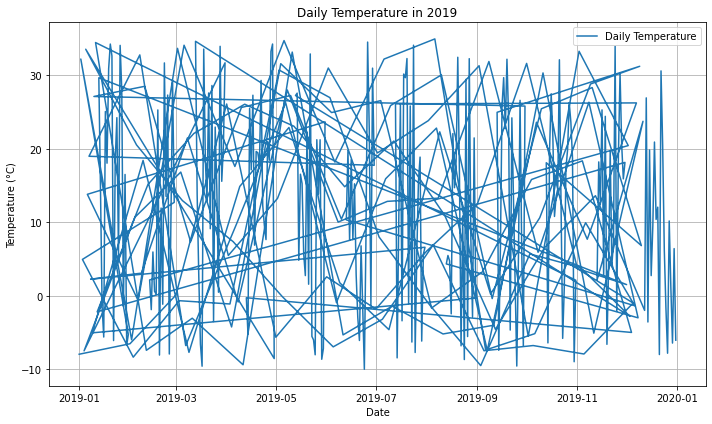

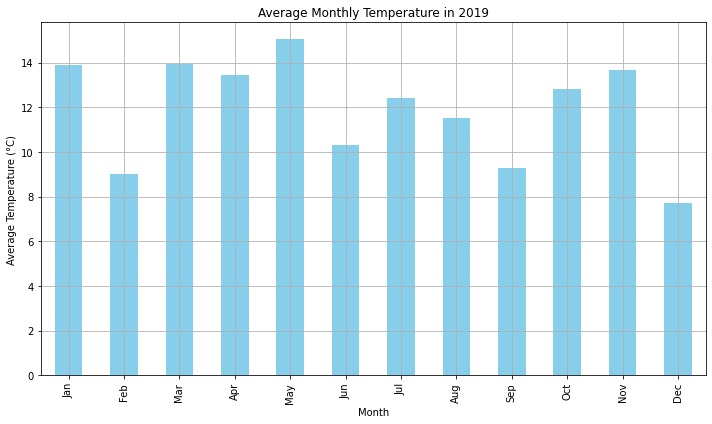

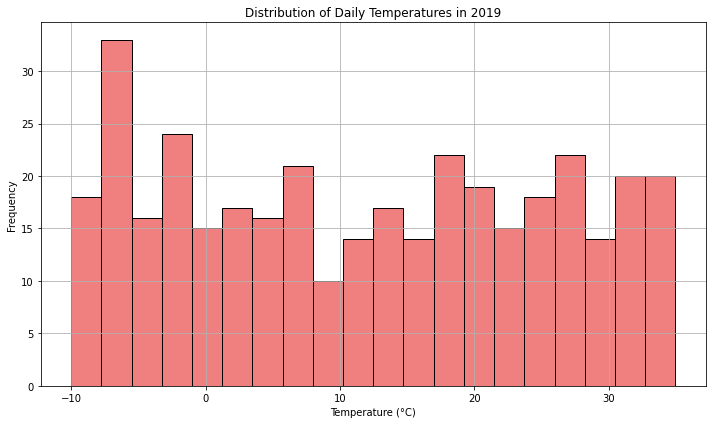

Shapiro-Wilk Test: Statistic = 0.9388865828514099, p-value = 4.173426534914704e-11
The data is not normally distributed.
Missing Data: Date               0
Temperature (C)    0
Month              0
dtype: int64
Outliers indices: (array([], dtype=int64),)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv(r"C:\Users\Siva\Downloads\climate_data_2019.csv", parse_dates=['Date'])


print("Basic Statistics:")
print(df.describe()) 

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Temperature (C)'], label='Daily Temperature')
plt.title('Daily Temperature in 2019')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')['Temperature (C)'].mean()

plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Temperature in 2019')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(df['Temperature (C)'], bins=20, edgecolor='black', color='lightcoral')
plt.title('Distribution of Daily Temperatures in 2019')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

stat, p_value = stats.shapiro(df['Temperature (C)'])
print(f"Shapiro-Wilk Test: Statistic = {stat}, p-value = {p_value}")

if p_value > 0.05:
    print("The data is likely to be normally distributed.")
else:
    print("The data is not normally distributed.")


missing_data = df.isnull().sum()
print(f"Missing Data: {missing_data}")


df['Temperature (C)'].fillna(df['Temperature (C)'].mean(), inplace=True)


z_scores = np.abs(stats.zscore(df['Temperature (C)']))
outliers = np.where(z_scores > 3)  
print(f"Outliers indices: {outliers}")
